## Домашнее задание

Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек.  
Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и какие гипотезы на ее основе можно выдвинуть.

In [1]:
import pandas as pd

Возьмем для анализа данные по трафику такси в NYC

In [34]:
df=pd.read_csv('nyc-taxi-trip-duration/train.csv', 'r', delimiter=',')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
import seaborn as sns

In [35]:
df_orders=df.filter(items=['vendor_id','pickup_datetime','trip_duration','passenger_count'])

In [36]:
df_orders.head()

,vendor_id,pickup_datetime,trip_duration,passenger_count
0,2,2016-03-14 17:24:55,455,1
1,1,2016-06-12 00:43:35,663,1
2,2,2016-01-19 11:35:24,2124,1
3,2,2016-04-06 19:32:31,429,1
4,2,2016-03-26 13:30:55,435,1


Для начала посмотрим в какой из дней недели в времени суток такси более востребовано. Для этого используем heatmap.  
Т.к. в данных  у нас только дата - то возьмем функцию, которая опеределить день недели в час в сутках.

In [55]:
from datetime import datetime
def weekday_hours(data):
    hours=[]
    weekday=[]
    hour_origin=[]
    for line in data.values:
        dt=datetime.strptime(line[1],'%Y-%m-%d %H:%M:%S')
        weekday.append(dt.isoweekday())
        hours.append(str(dt.hour)+'-'+str(dt.hour+1))
        hour_origin.append(dt.hour)
    data['weekday']=weekday
    data['hours']=hours
    data['hour_origin']=hour_origin
    return data
new_data=weekday_hours(df_orders)
new_data.head()

,vendor_id,pickup_datetime,trip_duration,passenger_count,month,weekday,hours,hour_origin
0,2,2016-03-14 17:24:55,455,1,3,1,17-18,17
1,1,2016-06-12 00:43:35,663,1,6,7,0-1,0
2,2,2016-01-19 11:35:24,2124,1,1,2,11-12,11
3,2,2016-04-06 19:32:31,429,1,4,3,19-20,19
4,2,2016-03-26 13:30:55,435,1,3,6,13-14,13


Подсчитываем количество поездок за каждый час по дням недели

In [62]:
new_data_grouped=new_data.groupby(['weekday','hour_origin']).trip_duration.count().reset_index()
new_data_grouped.rename(columns={'trip_duration':'cnt'}, inplace=True)
new_data_grouped.head()

,weekday,hour_origin,cnt
0,1,0,4299
1,1,1,2578
2,1,2,1658
3,1,3,1226
4,1,4,1351


In [64]:
heatmap_data = new_data_grouped.pivot_table(index='hour_origin', columns='weekday', values='cnt', aggfunc=sum).fillna(0).applymap(float)
heatmap_data.head()

weekday,1,2,3,4,5,6,7
hour_origin,,,,,,,
0,4299.0,4506.0,5327.0,6299.0,8779.0,11768.0,12270.0
1,2578.0,2574.0,3134.0,3632.0,5804.0,9989.0,10860.0
2,1658.0,1508.0,1890.0,2145.0,3949.0,8240.0,8582.0
3,1226.0,1012.0,1280.0,1550.0,2924.0,6037.0,6866.0
4,1351.0,1142.0,1252.0,1385.0,2313.0,3849.0,4500.0


In [38]:
import matplotlib.pyplot as plt

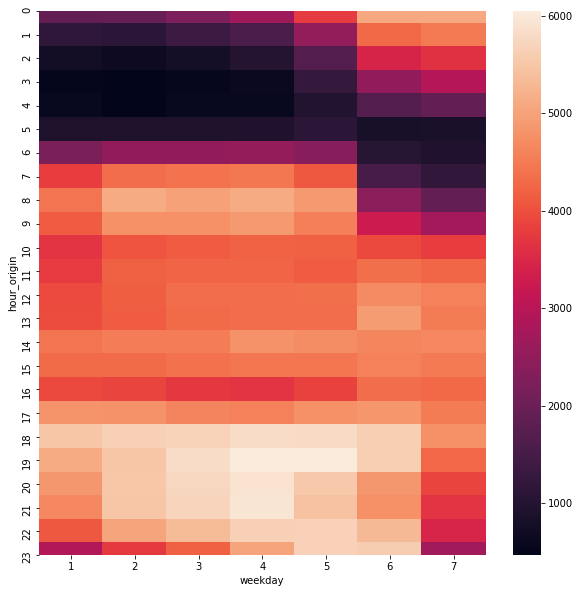

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(heatmap_data, ax=ax)
plt.show()

По карте можно сделать ожидаемые выводы:  
1) Наибольший спрос приходится в вечернее время, особенно пик спроса приходится ожидаемо на четверг и пятницу 18:00 - 19:00  
2) Наименьший спрос в ночные часы в будни и воскресенье  
3) также спрос есть в выходные в районе часа-двух ночи (что оже ожидаемо по понятным причинам :))

Можно также посмотреть сколько заказов приходится на каждого из вендоров.  
Для этого можно построить круговую диаграмму.

In [91]:
values = df_orders.groupby('vendor_id').pickup_datetime.count()
labels=df_orders.vendor_id.unique()

In [92]:
values

vendor_id
1    678342
2    780302
Name: pickup_datetime, dtype: int64

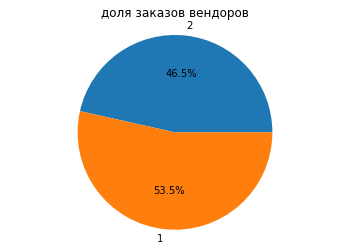

In [96]:
plt.title('доля заказов вендоров')
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

В таблице с данными видно, что на вендора 2 приходится больше заказов, но на диаграмме подписи проставляются наоброт - не смогла понять почему.

Можно посмотреть и сравнить сколько заказов было у каждого вендора в размере месяцев

In [42]:
from datetime import datetime
def to_month(line):
    dt=datetime.strptime(line,'%Y-%m-%d %H:%M:%S')
    return dt.month

In [44]:
df_orders['month']=df_orders.pickup_datetime.apply(to_month,1)
df_monthly__orders=df_orders.groupby(['vendor_id','month']).count()
df_monthly__orders=df_monthly__orders.reset_index()
df_monthly__orders

,vendor_id,month,pickup_datetime,trip_duration,passenger_count
0,1,1,105602,105602,105602
1,1,2,110210,110210,110210
2,1,3,118813,118813,118813
3,1,4,117710,117710,117710
4,1,5,116130,116130,116130
5,1,6,109877,109877,109877
6,2,1,124105,124105,124105
7,2,2,128090,128090,128090
8,2,3,137376,137376,137376
9,2,4,133935,133935,133935


In [27]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [76]:
line_1 = go.Bar(
    x=df_monthly__orders[df_monthly__orders['vendor_id']==1].month,
    y=df_monthly__orders[df_monthly__orders['vendor_id']==1].pickup_datetime,
    name='Vendor 1',
)

line_2 = go.Bar(
    x=df_monthly__orders[df_monthly__orders['vendor_id']==2].month,
    y=df_monthly__orders[df_monthly__orders['vendor_id']==2].pickup_datetime,
    name='Vendor 2',
)

In [98]:
data = [line_1, line_2]
layout = {'title': 'Количество заказов по вендорам в разрезе месяцев'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

По диаграмме в разрезе месяцев видим, что действительно у второго вендора заказов больше.

Можно посмотреть сколько в среднем пассажиров совершают поездки у каждого вендора.

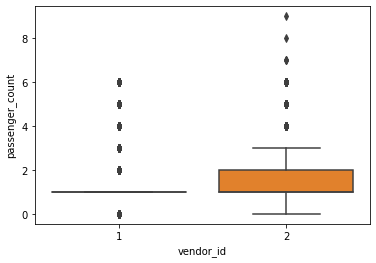

In [53]:
df_passengers=df.filter(items=['vendor_id','passenger_count','trip_duration'])
sns.boxplot(x="vendor_id", y="passenger_count", data=df_passengers)

По ящикам вдим, что у первого вендора обычно совершают поездки одиночки, тогда как у второго два и более.

Построим график отношения количества заказов к количеству пассажиров по каждому из вендоров:

In [99]:
df_passengers_cnt=df_passengers.groupby(['vendor_id','passenger_count']).trip_duration.count().reset_index()
df_pivot = df_passengers_cnt.pivot_table(
                        index='passenger_count', 
                        columns='vendor_id', 
                        values='trip_duration', 
                        aggfunc=sum).fillna(0).applymap(float)

In [103]:
df_pivot

vendor_id,1,2
passenger_count,,
0,31.0,29.0
1,550787.0,482753.0
2,92142.0,118176.0
3,22942.0,36954.0
4,11944.0,16460.0
5,344.0,77744.0
6,152.0,48181.0
7,0.0,3.0
8,0.0,1.0


In [102]:
def plotly_line_plot(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)
    
plotly_line_plot(
    df_pivot,
    title = 'Количество заказов на количество пассажиров в заказе по вендорам'
)

Из графика видно, что большиство поездок совершаются в одиночестве (что вполне ожидаемо и нормально), однако у второго вендора достаточно много поездок совершено пассажирами в группах от 4 до 6 человек - можно предположить, что у вендора есть какие-то плюшки для групповых поездок или имеет корпоративный тариф. 